<a href="https://colab.research.google.com/github/ksailesh/housing_price_project/blob/main/EDA_of_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read the Dataset

In [6]:
# Read the Housing Prices dataset

import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1Ctyee326n6IQfTh9Bb2PvZVMQS8q0DDqU9_AQMb7EQ8/export?format=csv"

df = pd.read_csv(url)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         565         259         3.8462              342200        NEAR BAY  
3         413         193         4.0368              269700        NEAR BAY  
4        1094         514         3.6591              299200        NEAR BAY

# Understanding the Data Types and Distribution

In [4]:
# View the Data Types

df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [5]:
# Generate descriptive statistics of the dataset

df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  18565.000000  18565.000000        18565.000000  18565.000000   
mean    -119.570116     35.633888           28.615890   2634.033827   
std        2.002922      2.137014           12.564224   2195.915548   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1442.000000   
50%     -118.500000     34.260000           29.000000   2123.000000   
75%     -118.010000     37.710000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    18376.000000  18565.000000  18565.000000   18565.000000   
mean       537.711199   1426.223108    499.450902       3.867012   
std        424.125849   1142.570832    384.553175       1.895988   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.000000    786.000000    279.000000       2.561200   
50%        434.000000   1166.000000    408.000000       3.534100   
75%        646.000000   1725.000000    603.000000       4.741100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        18565.000000  
mean        206617.794991  
std         115447.104881  
min          14999.000000  
25%         119300.000000  
50%         179400.000000  
75%         264400.000000  
max         500001.000000

# Preprocessing: Missing values
1.   Fill the missing values
2.   Remove samples with missing values


In [ ]:
# Drop 189 records (~1%) without total_bedrooms data.
# Convert Float type to INT type

df_nonnull = df.dropna(subset=['total_bedrooms'], inplace=False)
df_nonnull.loc[:, "total_bedrooms"] = df_nonnull["total_bedrooms"].astype('Int64')
df_nonnull.describe()

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [ ]:
# Check the missing data in the dataframe

# Check for missing data
missing_data = df.isnull().sum()
missing_data

## 189 samples do not have total_bedrooms data

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        189
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Impute the missing total_bedrooms data using SimplyImputer

from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'total_bedrooms' column
imputer.fit(df[['total_bedrooms']])

# Transform the 'total_bedrooms' column to impute missing values
df_imputed = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_imputed['total_bedrooms'] = imputer.transform(df[['total_bedrooms']])
df_imputed["total_bedrooms"] = df_imputed["total_bedrooms"].astype('Int64')

# Now df_imputed contains the imputed 'total_bedrooms' column
print(df_imputed.isnull().sum())
df_imputed.dtypes

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          Int64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

# Univariate Analysis


## Observations:
1.   About 76% of the samples are from 1H OCEAN and INLAND.
2.   Long right tails are noticed in all attributes except housing_median_age
3.   There is a big spike for median_house_value = 500000.
     Action Item: Need to validate if it is a data entry error or the higher house values are capped at this level.






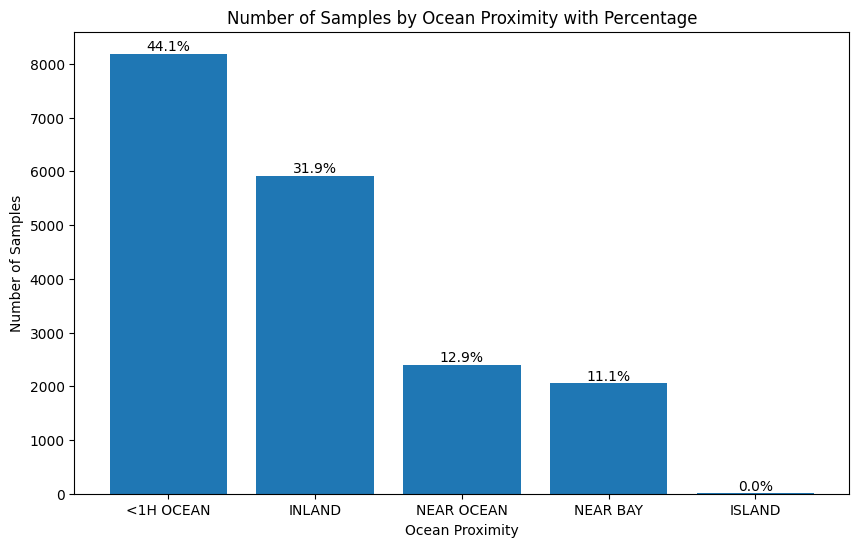

In [14]:
# Visualize the Number of samples by ocean_proximity

import matplotlib.pyplot as plt

# Calculate the number of samples for each ocean_proximity category
ocean_proximity_counts = df_imputed['ocean_proximity'].value_counts()

# Calculate the percentage of samples for each category
ocean_proximity_percentages = (ocean_proximity_counts / len(df_imputed)) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(ocean_proximity_counts.index, ocean_proximity_counts.values)

# Add percentage labels to the bars
for bar, percentage in zip(bars, ocean_proximity_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Ocean Proximity')
plt.ylabel('Number of Samples')
plt.title('Number of Samples by Ocean Proximity with Percentage')
plt.show()

Outliers in housing_median_age:
Series([], Name: housing_median_age, dtype: int64)


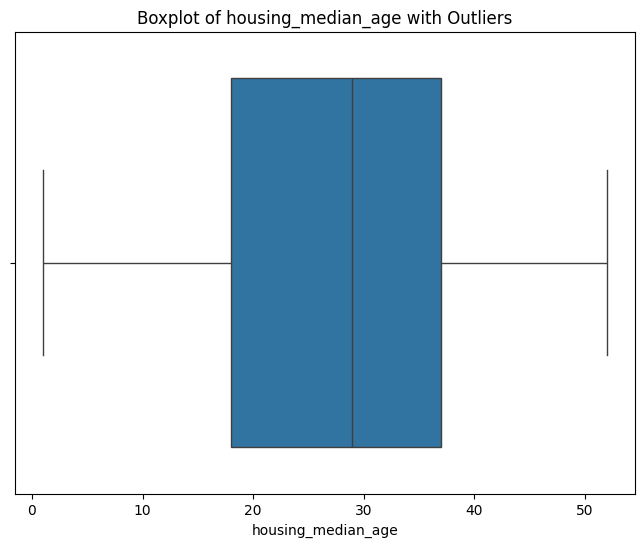

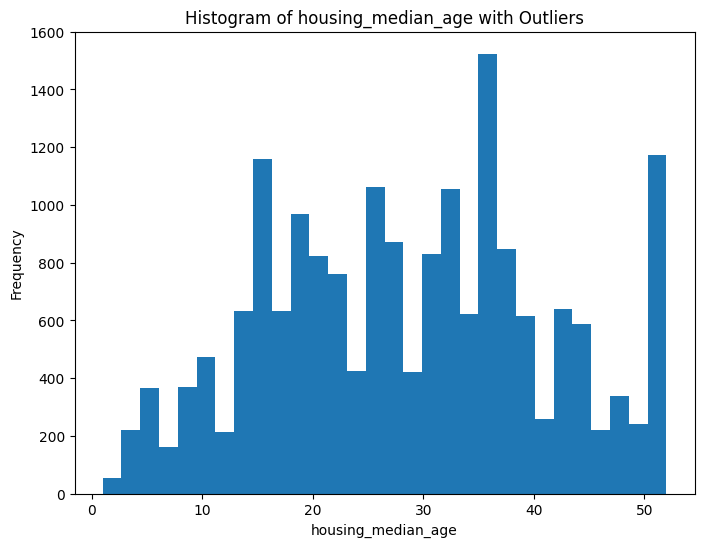

Outliers in total_rooms:
1         7099
94        5806
97        5871
170       5963
258      12842
         ...  
18477     6861
18478     8800
18495    12139
18499     6809
18554    10035
Name: total_rooms, Length: 1166, dtype: int64


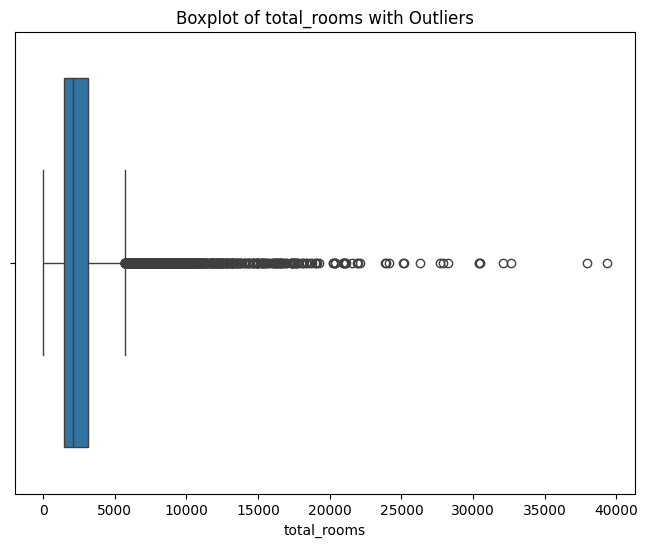

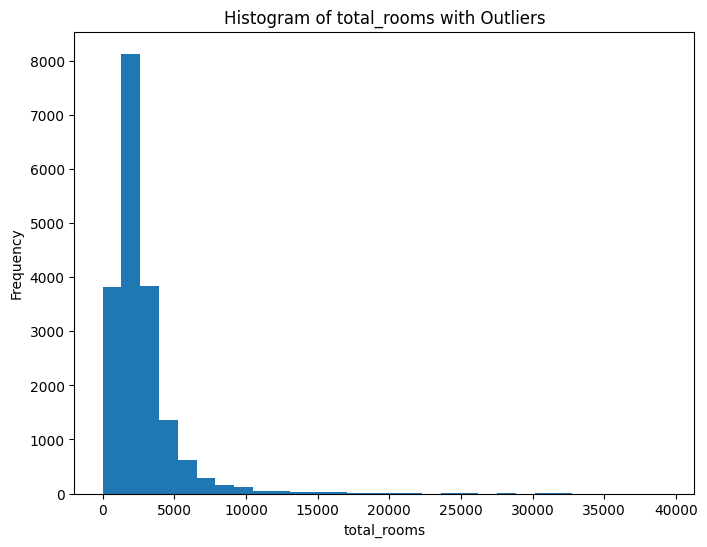

Outliers in total_bedrooms:
88       2477.0
89       1331.0
91       1270.0
93       1414.0
94       1603.0
          ...  
18474    1516.0
18477    1820.0
18478    1857.0
18495    2640.0
18554    1856.0
Name: total_bedrooms, Length: 1146, dtype: float64


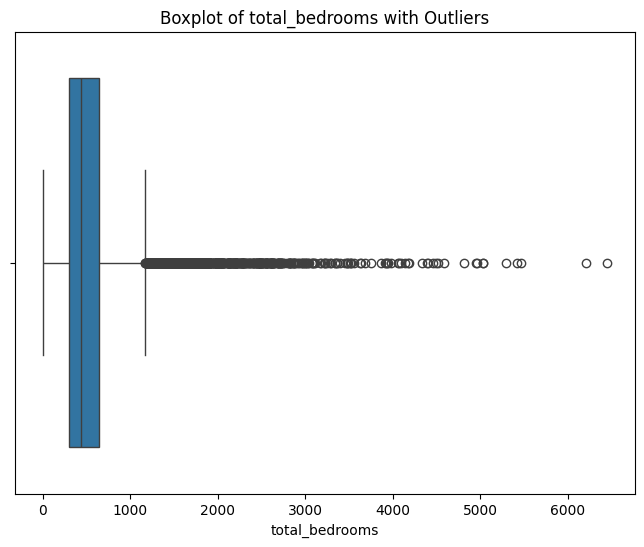

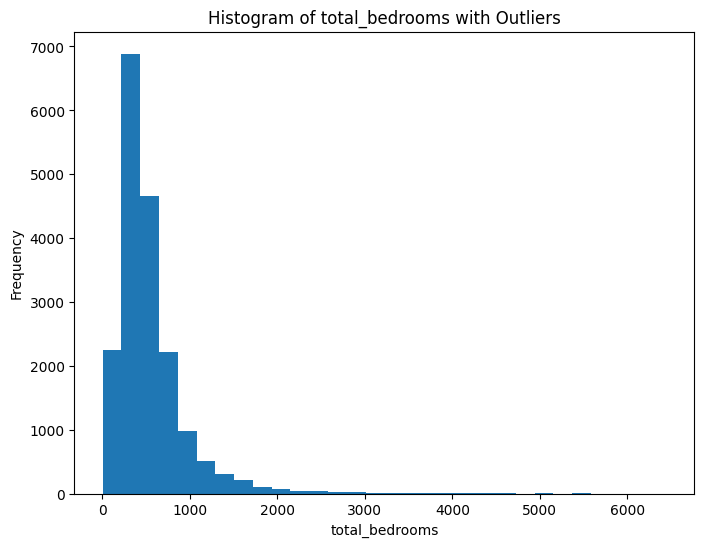

Outliers in population:
88       3469
170      4367
258      4985
415      3337
440      3276
         ... 
18477    3717
18478    6330
18495    6837
18532    3265
18554    6912
Name: population, Length: 1071, dtype: int64


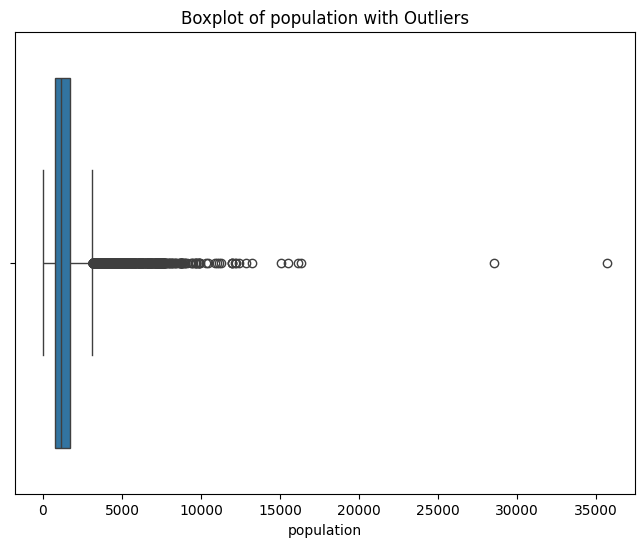

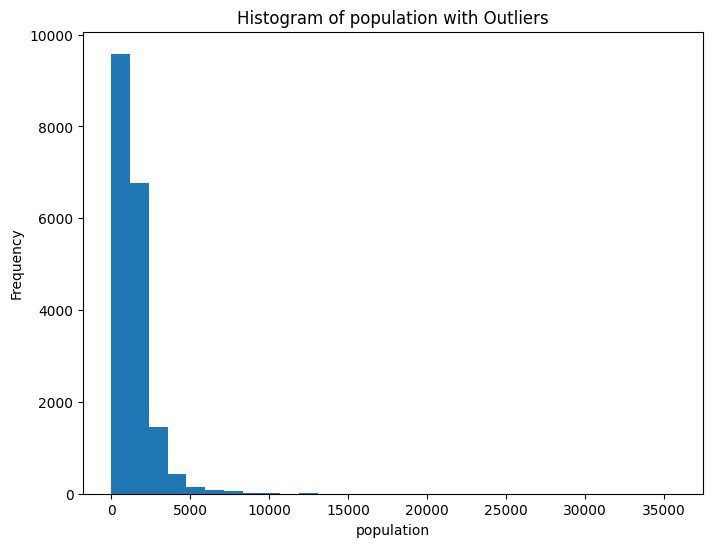

Outliers in households:
1        1138
88       2323
89       1180
91       1250
93       1250
         ... 
18476    1115
18477    1767
18478    1832
18495    2358
18554    1818
Name: households, Length: 1109, dtype: int64


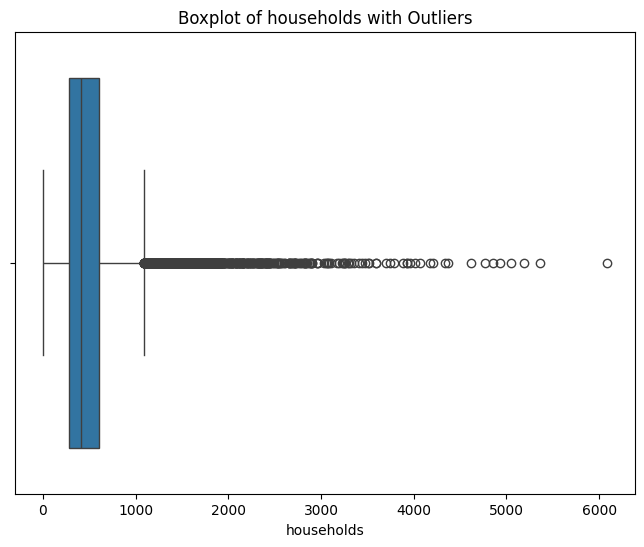

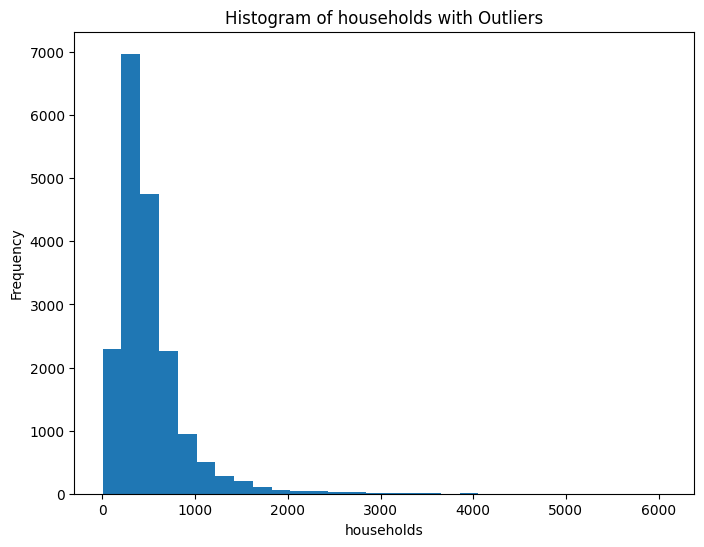

Outliers in median_income:
0         8.3252
1         8.3014
122      11.6017
125       8.2049
126       8.4010
          ...   
18370    10.0472
18371     8.6499
18372     8.7288
18380    12.5420
18442     8.2787
Name: median_income, Length: 609, dtype: float64


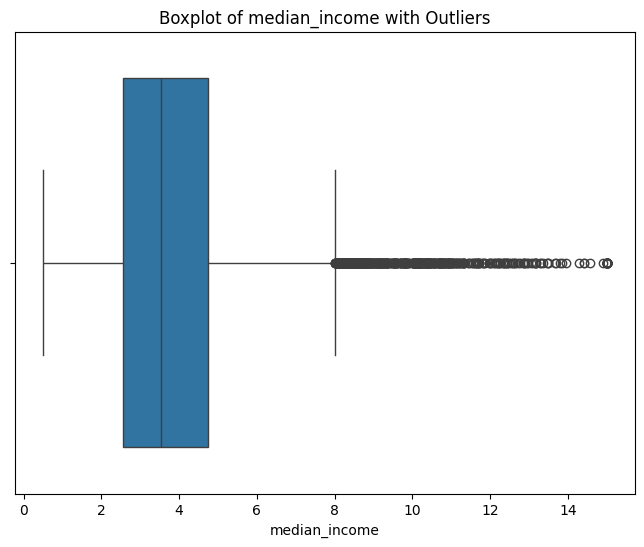

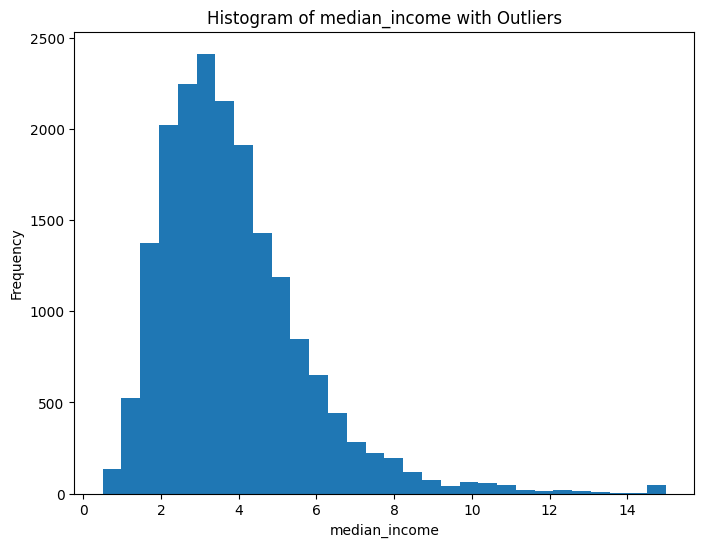

Outliers in median_house_value:
82       500001
414      500001
444      489600
448      500001
449      500001
          ...  
18366    500001
18370    500001
18371    500001
18380    500001
18387    500001
Name: median_house_value, Length: 964, dtype: int64


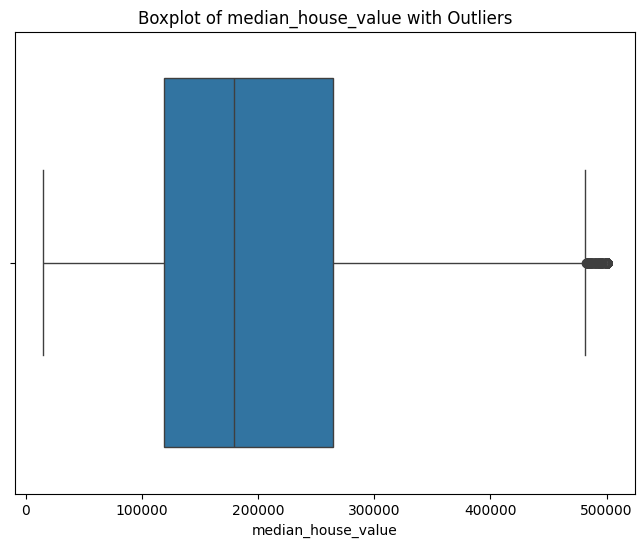

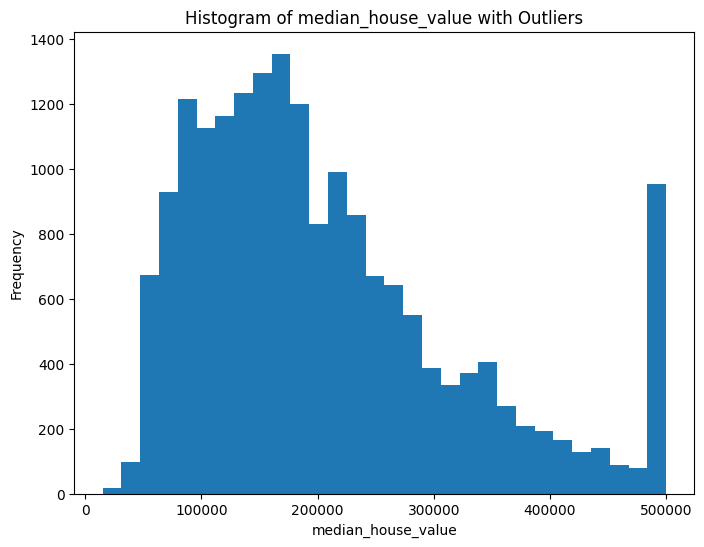

In [11]:
# Find the distribution of the each data attribute

import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect outliers using IQR
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Iterate through numerical columns and find outliers
for column in df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]:
    outliers = find_outliers_iqr(df[column])
    print(f"Outliers in {column}:")
    print(outliers)

    # Visualization
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} with Outliers')
    plt.show()

    # Histogram for distribution visualization
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30)
    plt.title(f'Histogram of {column} with Outliers')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Multivariant Analysis


## Observations:

1.   NEAR BAY and ISLAND have higher median age houses distribution compared to other localities
2.   Long right tails are noticed in total_rooms, total_bedrooms, population, medium_income across all Ocean Proximity types.
3.   However, Long right tails are noticed in median_house_value only in 1H OCEAN and INLAND Proximity types
4.   Most of the extreme values (could be a valid outliers) are located at major cities: San Francisco, Los Angeles, San Diego, San Jose and Fresno

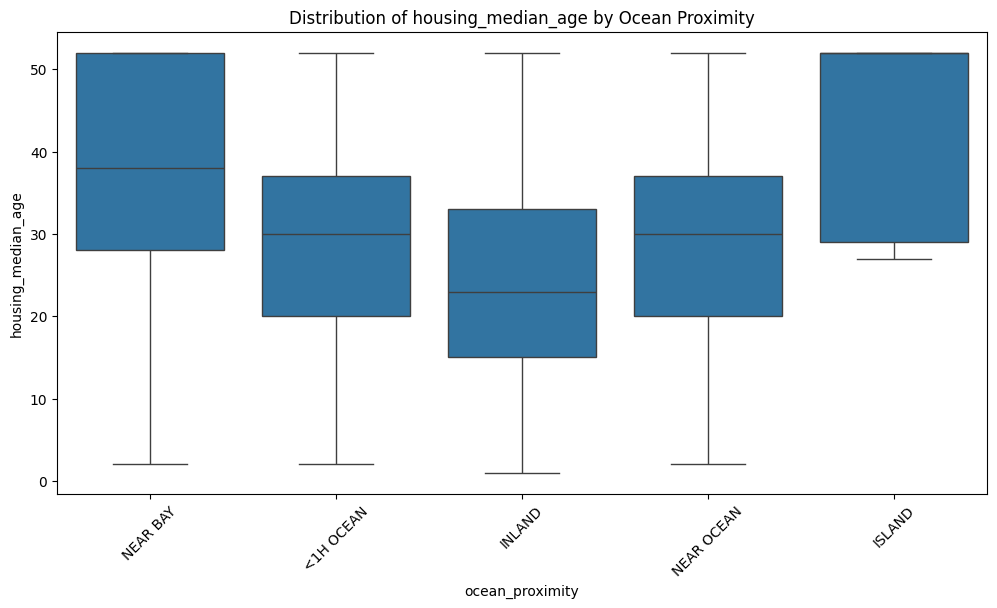

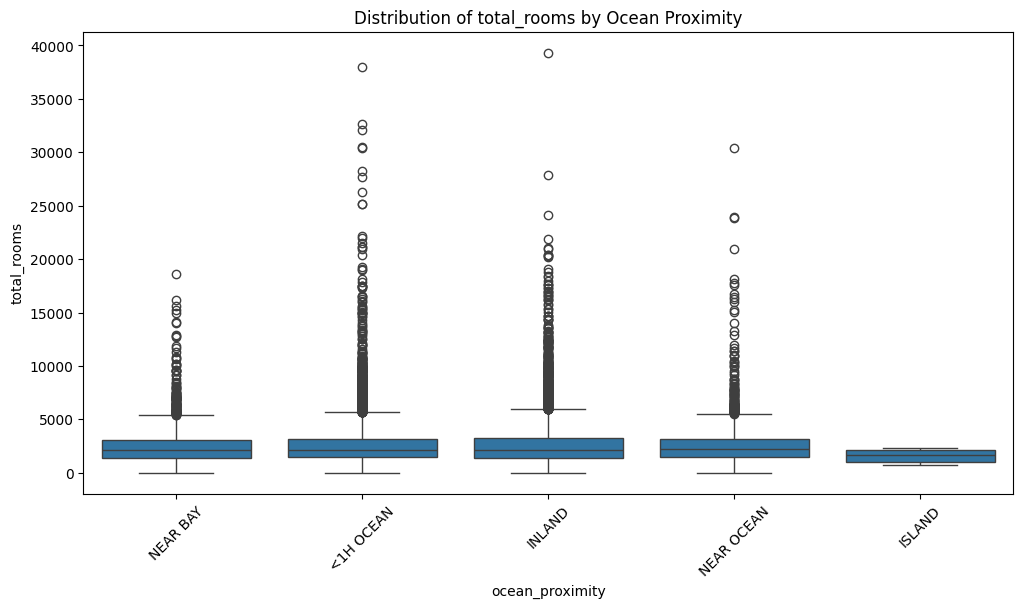

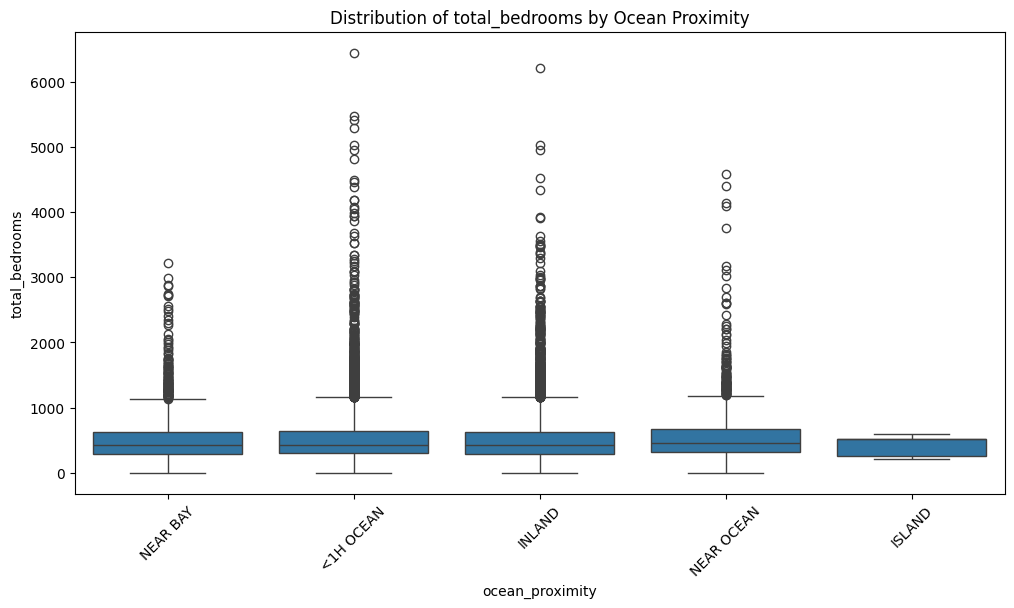

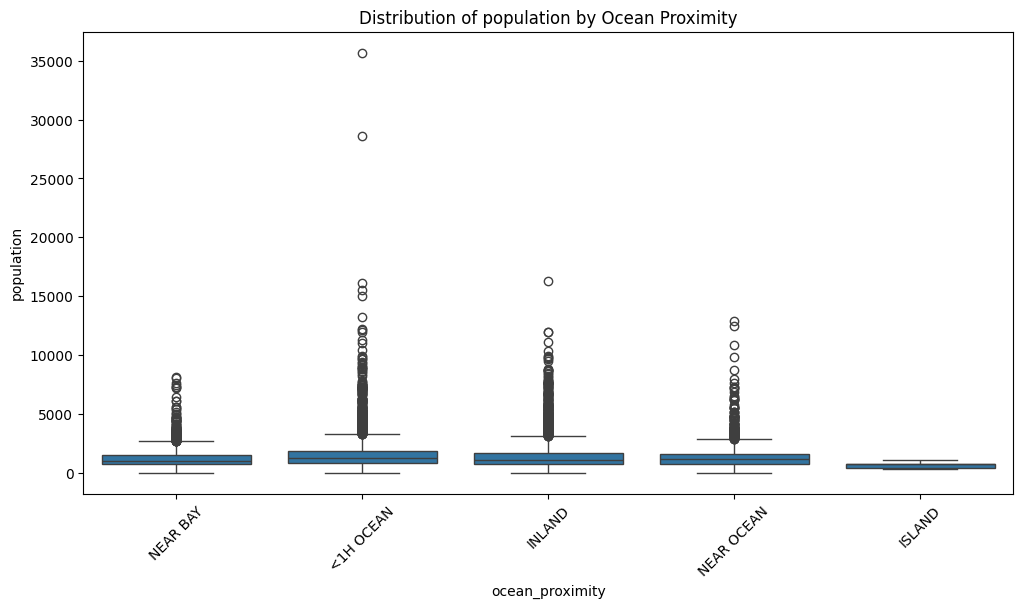

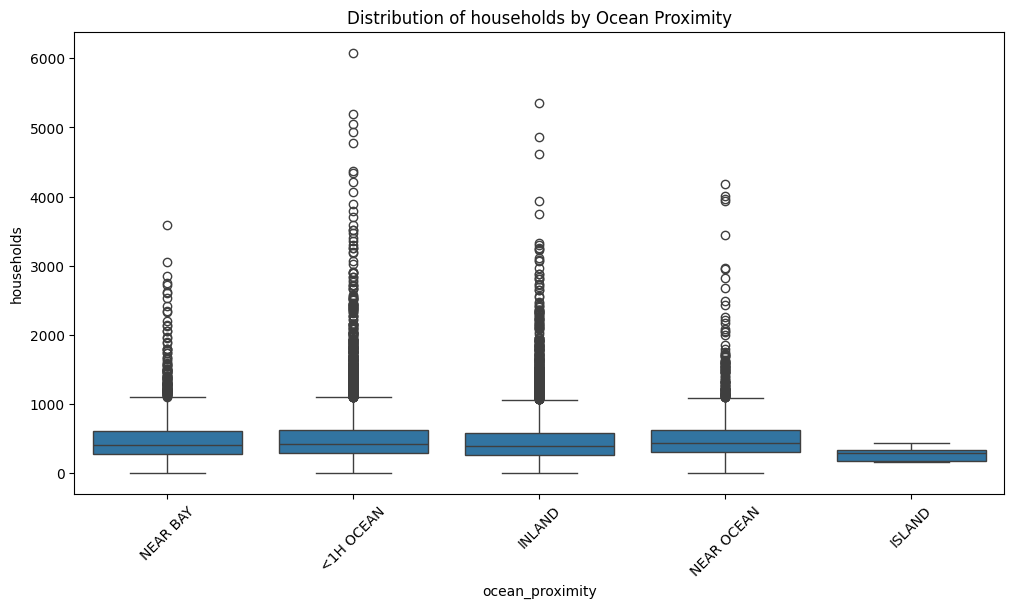

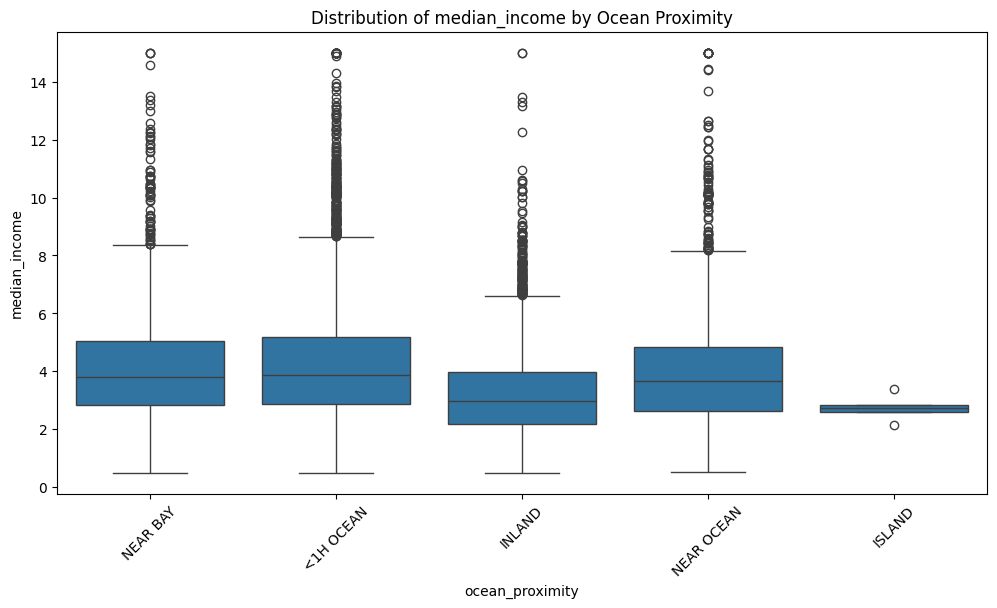

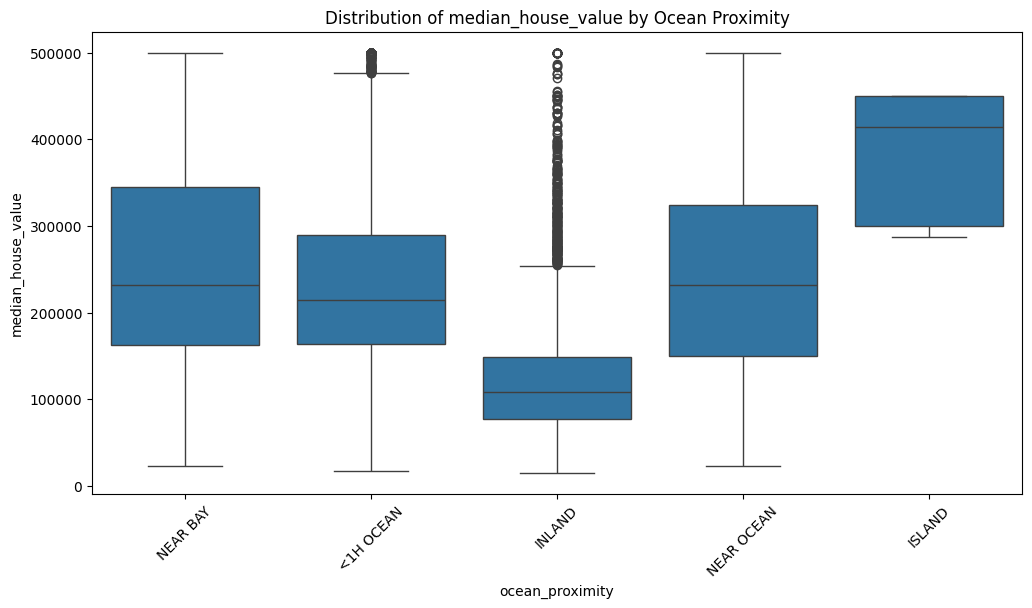

In [8]:
# Visualize housing_median_age, total_rooms, total_bedrooms, population, households, median_income and median_house_value distribution by ocean_proximity category

for col in ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='ocean_proximity', y=col, data=df_imputed)
    plt.title(f'Distribution of {col} by Ocean Proximity')
    plt.xticks(rotation=45)
    plt.show()

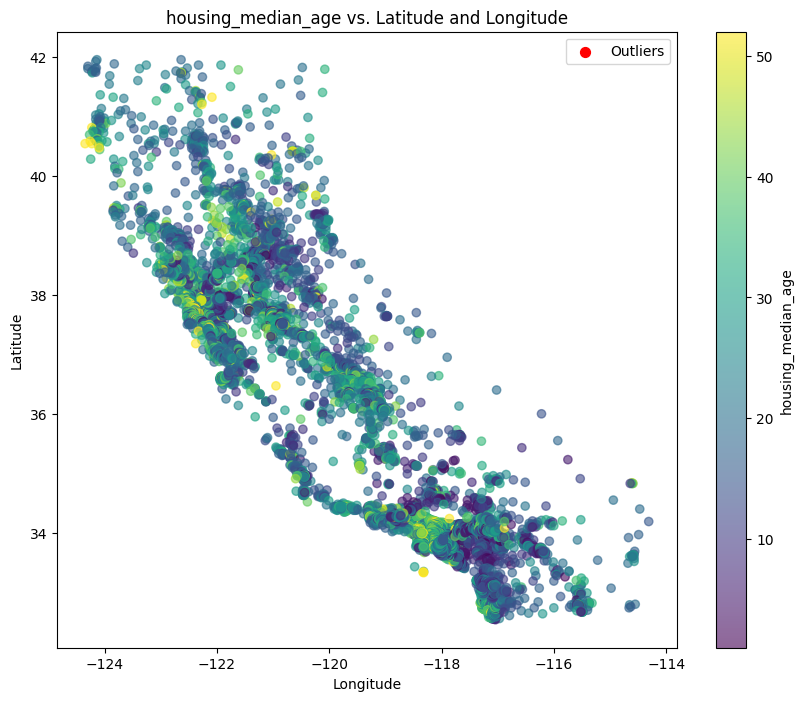

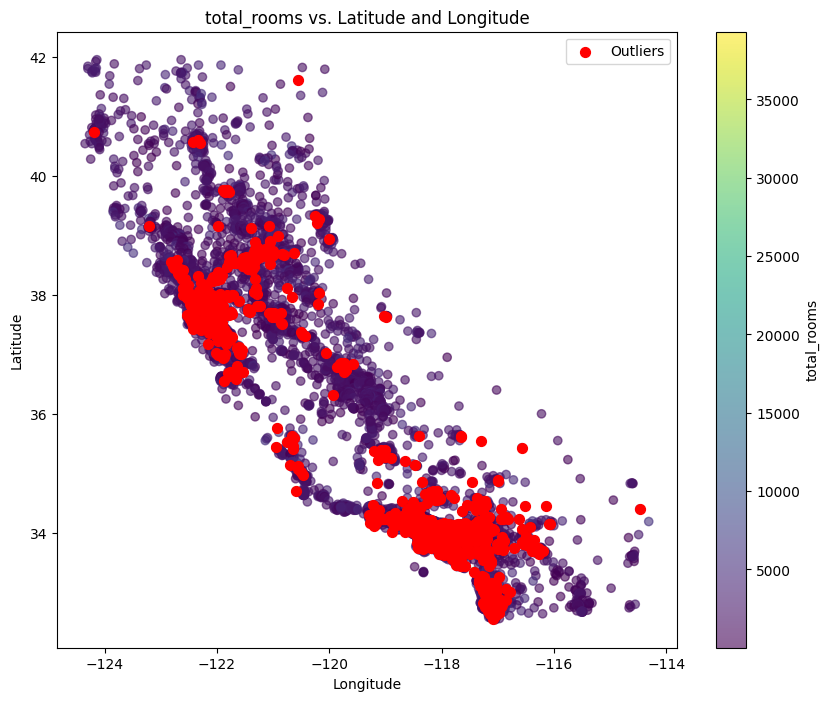

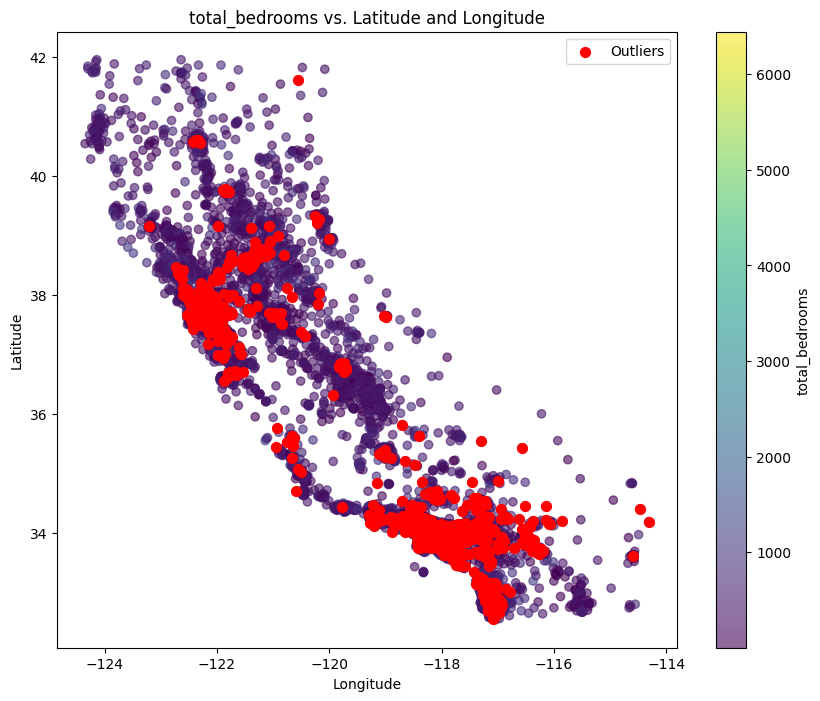

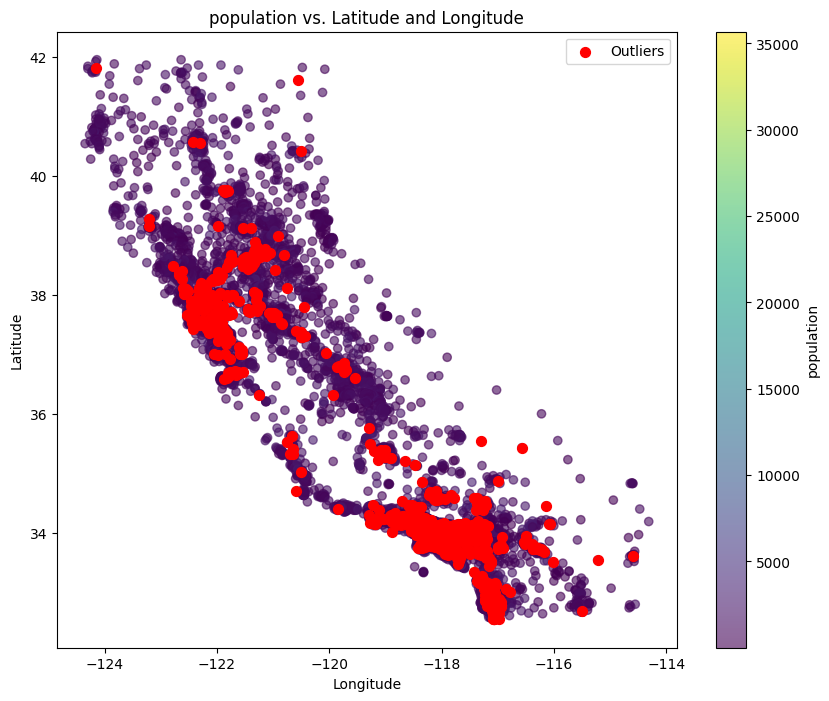

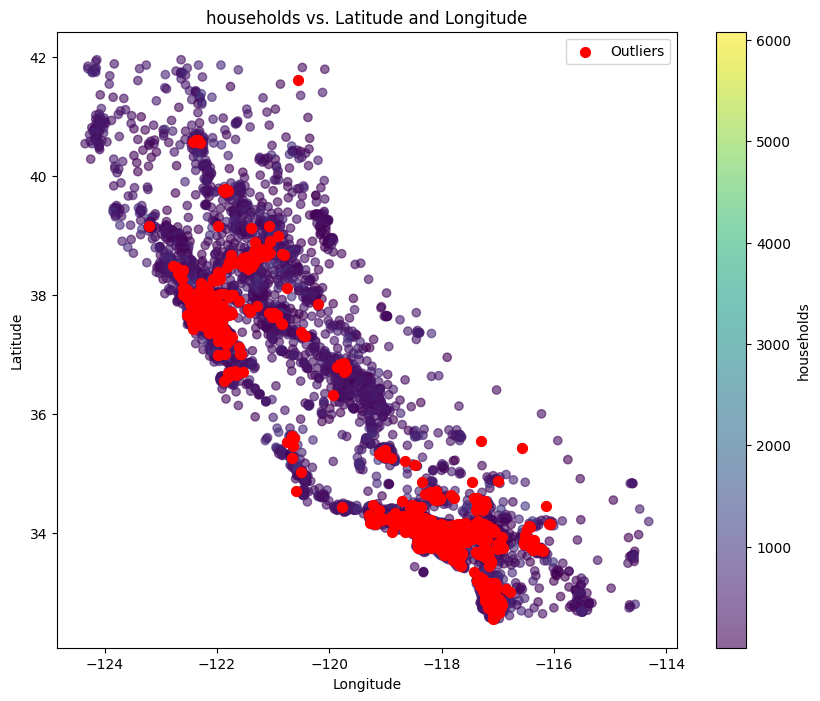

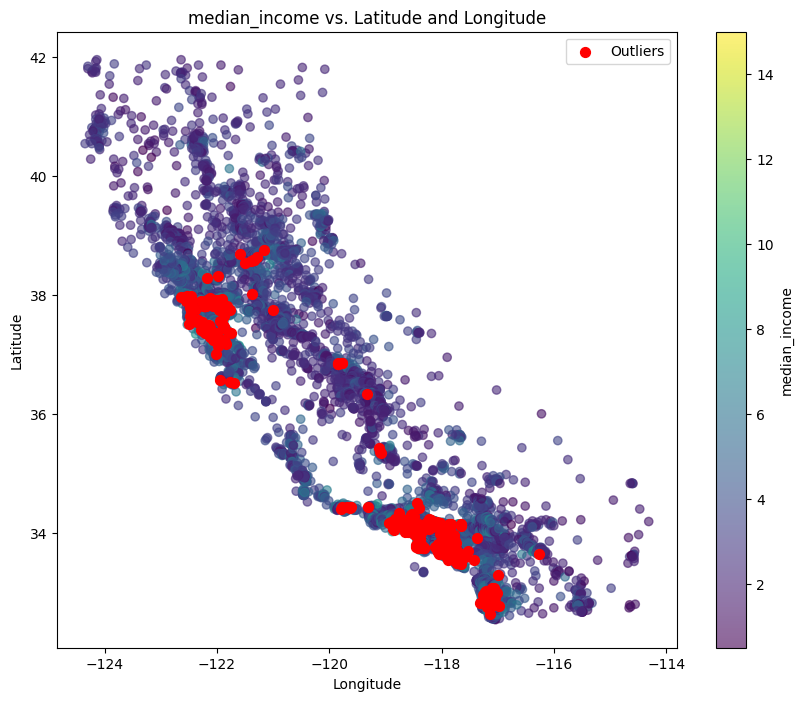

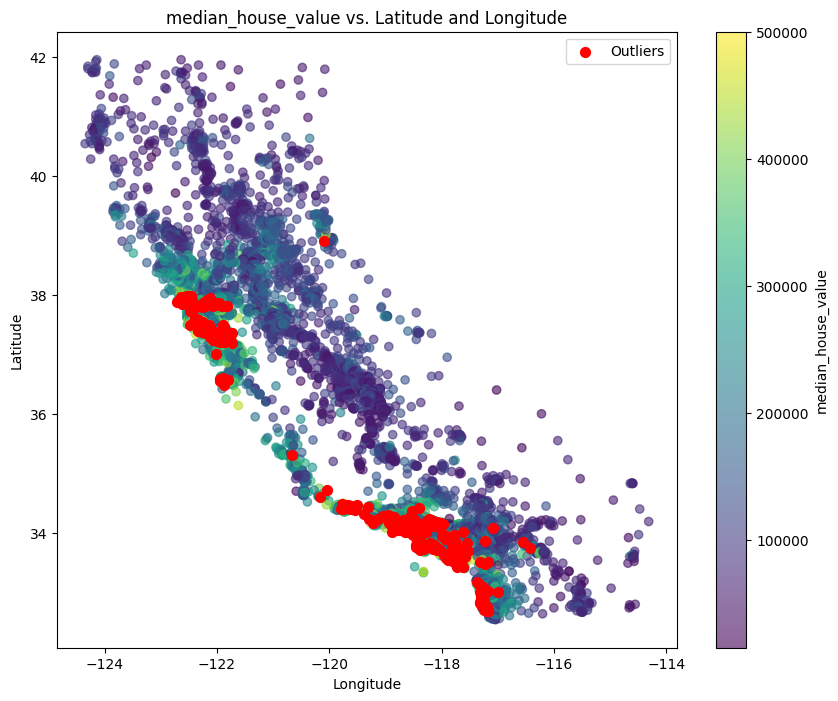

In [ ]:
# Visualize the housing_median_age, total_rooms, total_bedrooms, population, households, median_income and median_house_value
#  against the latitude and longitude attributes and highlighted outliers data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df' and has already been processed as in your provided code

# List of numerical features to visualize
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Create scatter plots for each numerical feature against latitude and longitude
for feature in numerical_features:
    plt.figure(figsize=(10, 8))

    # Scatter plot with color coding based on the feature value
    scatter = plt.scatter(df['longitude'], df['latitude'], c=df[feature], cmap='viridis', alpha=0.6)

    # Add colorbar
    plt.colorbar(scatter, label=feature)

    # Highlight outliers (you might need to adjust outlier detection criteria)
    outliers = find_outliers_iqr(df[feature]) # using your previously defined outlier function
    plt.scatter(df.loc[outliers.index, 'longitude'], df.loc[outliers.index, 'latitude'], color='red', label='Outliers', s=50)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'{feature} vs. Latitude and Longitude')
    plt.legend()
    plt.show()

In [ ]:
# Visualize the ocean_proximity attribute against the location

import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="ocean_proximity", zoom=5,
                       mapbox_style="carto-positron",
                       hover_name="ocean_proximity",
                       hover_data=['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'])

fig.show()

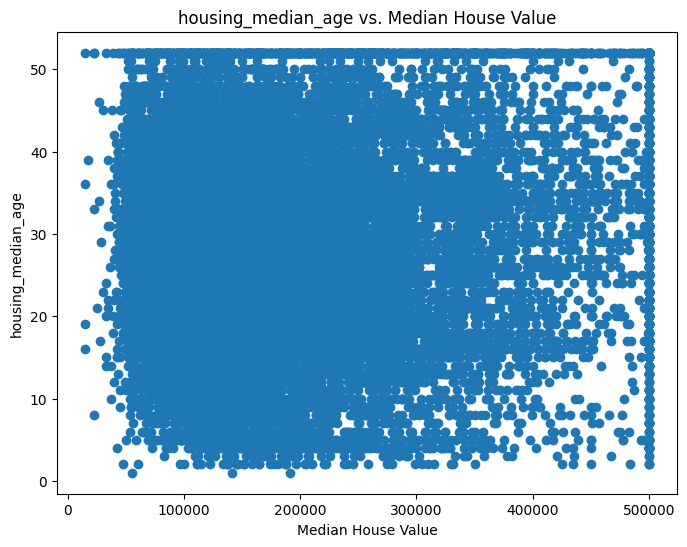

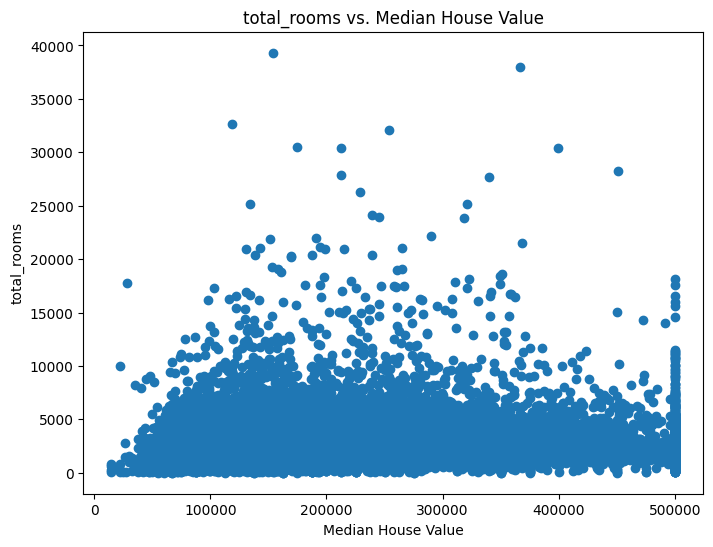

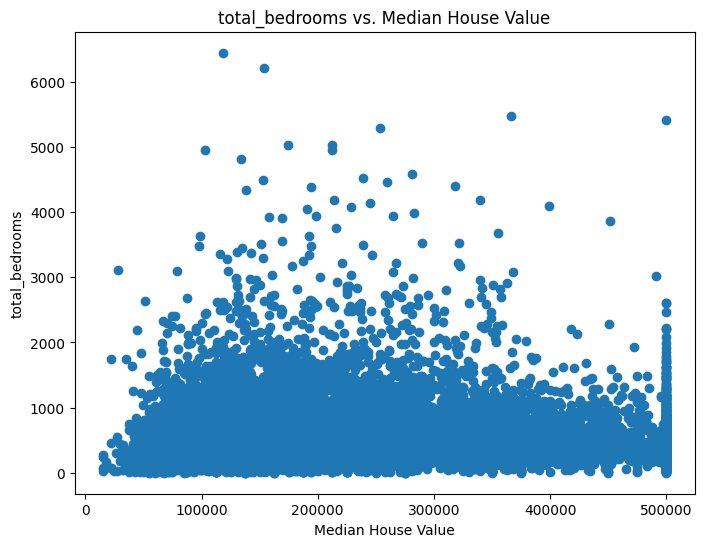

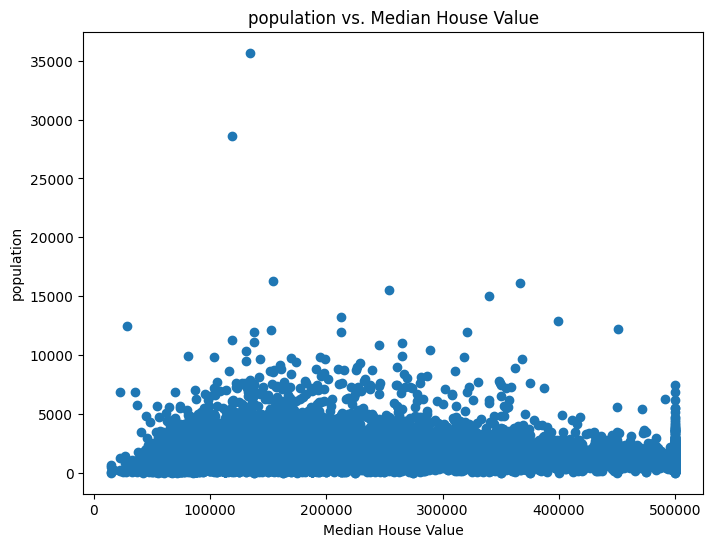

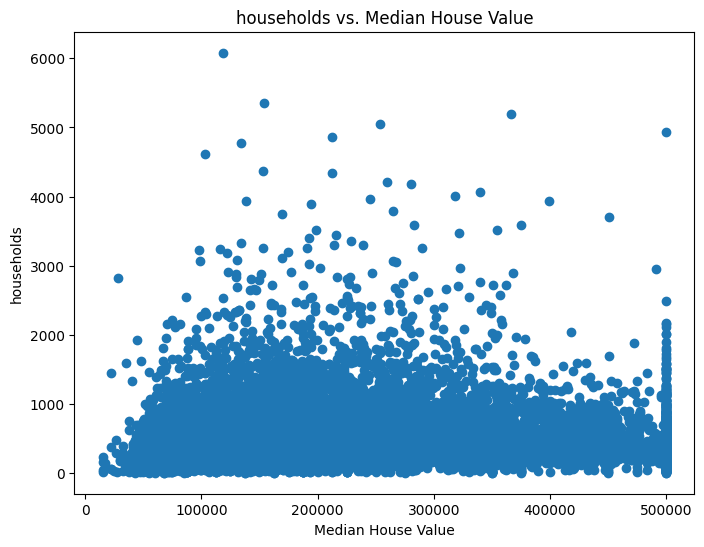

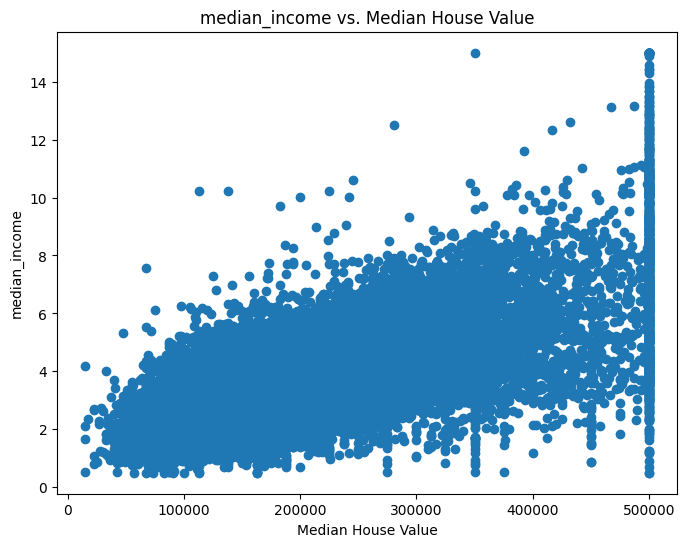

In [ ]:
# Plot 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income' against median house value to understand the distribution

# Assuming your dataframe is named 'df' and has been processed as in your provided code

features_to_plot = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['median_house_value'], df[feature])
    plt.xlabel('Median House Value')
    plt.ylabel(feature)
    plt.title(f'{feature} vs. Median House Value')
    plt.show()

# Correlation Analysis

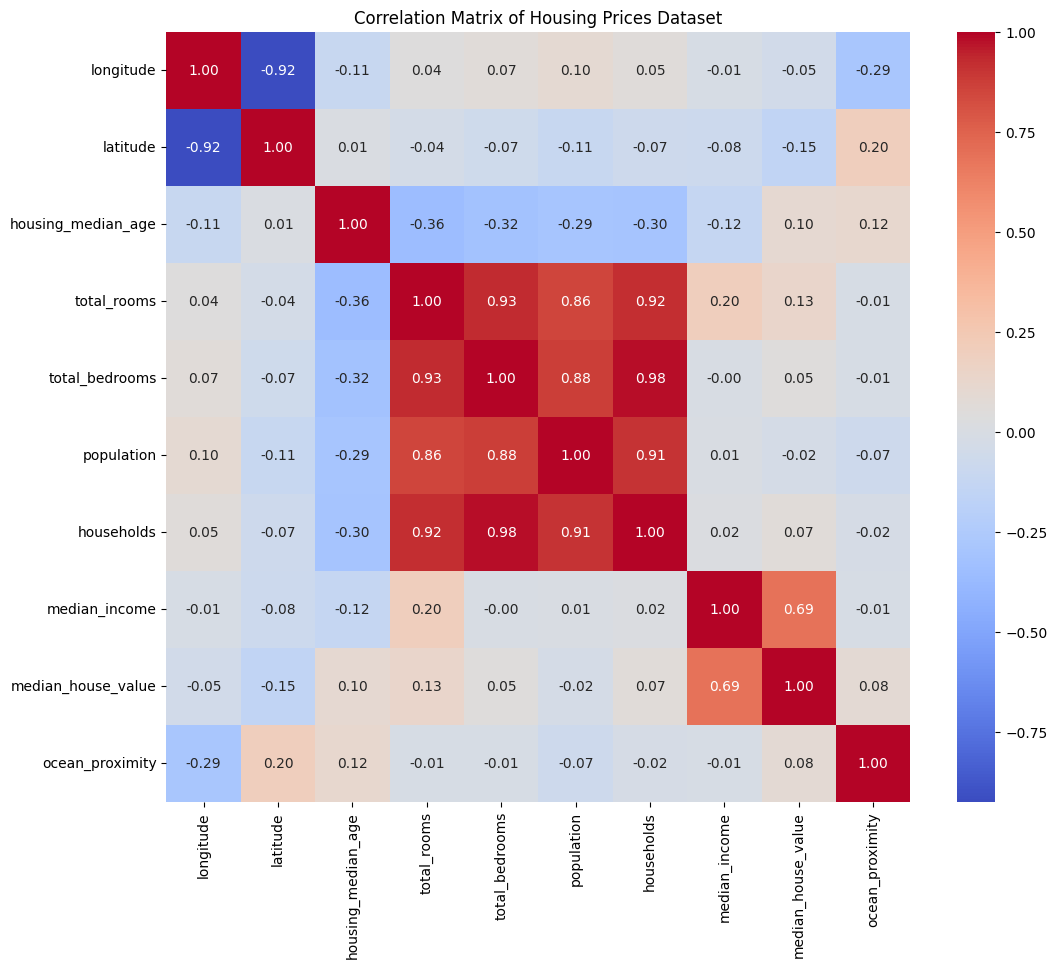

In [15]:
# Visualize the correlation matrix

# Convert ocean_proximity to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Prices Dataset')
plt.show()

# Feature Engineering

In [38]:
# Enrich with new features

df_enriched = df_imputed.copy()

df_enriched['rooms_per_household'] = df_enriched['total_rooms'] / df_enriched['households']
df_enriched['population_per_household'] = df_enriched['population'] / df_enriched['households']
df_enriched['bedrooms_per_household'] = df_enriched['total_bedrooms'] / df_enriched['households']
df_enriched['bedrooms_per_room'] = df_enriched['total_bedrooms'] / df_enriched['total_rooms']
df_enriched['income_per_population'] = df_enriched['median_income'] / df_enriched['population']
df_enriched['income_per_household'] = df_enriched['median_income'] / df_enriched['households']

df_enriched.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.25     37.85                  52         1627             280   
3    -122.25     37.85                  52          919             213   
4    -122.25     37.84                  52         2535             489   

   population  households  median_income  median_house_value ocean_proximity  \
0         322         126         8.3252              452600        NEAR BAY   
1        2401        1138         8.3014              358500        NEAR BAY   
2         565         259         3.8462              342200        NEAR BAY   
3         413         193         4.0368              269700        NEAR BAY   
4        1094         514         3.6591              299200        NEAR BAY   

   rooms_per_household  population_per_household  bedrooms_per_household  \
0             6.984127                  2.555556                 1.02381   
1             6.238137                  2.109842                 0.97188   
2             6.281853                  2.181467                1.081081   
3             4.761658                  2.139896                1.103627   
4             4.931907                  2.128405                0.951362   

   bedrooms_per_room  income_per_person  income_per_household  \
0           0.146591           0.025855              0.066073   
1           0.155797           0.003457              0.007295   
2           0.172096           0.006807              0.014850   
3           0.231774           0.009774              0.020916   
4           0.192899           0.003345              0.007119   

   income_per_population  
0               0.025855  
1               0.003457  
2               0.006807  
3               0.009774  
4               0.003345

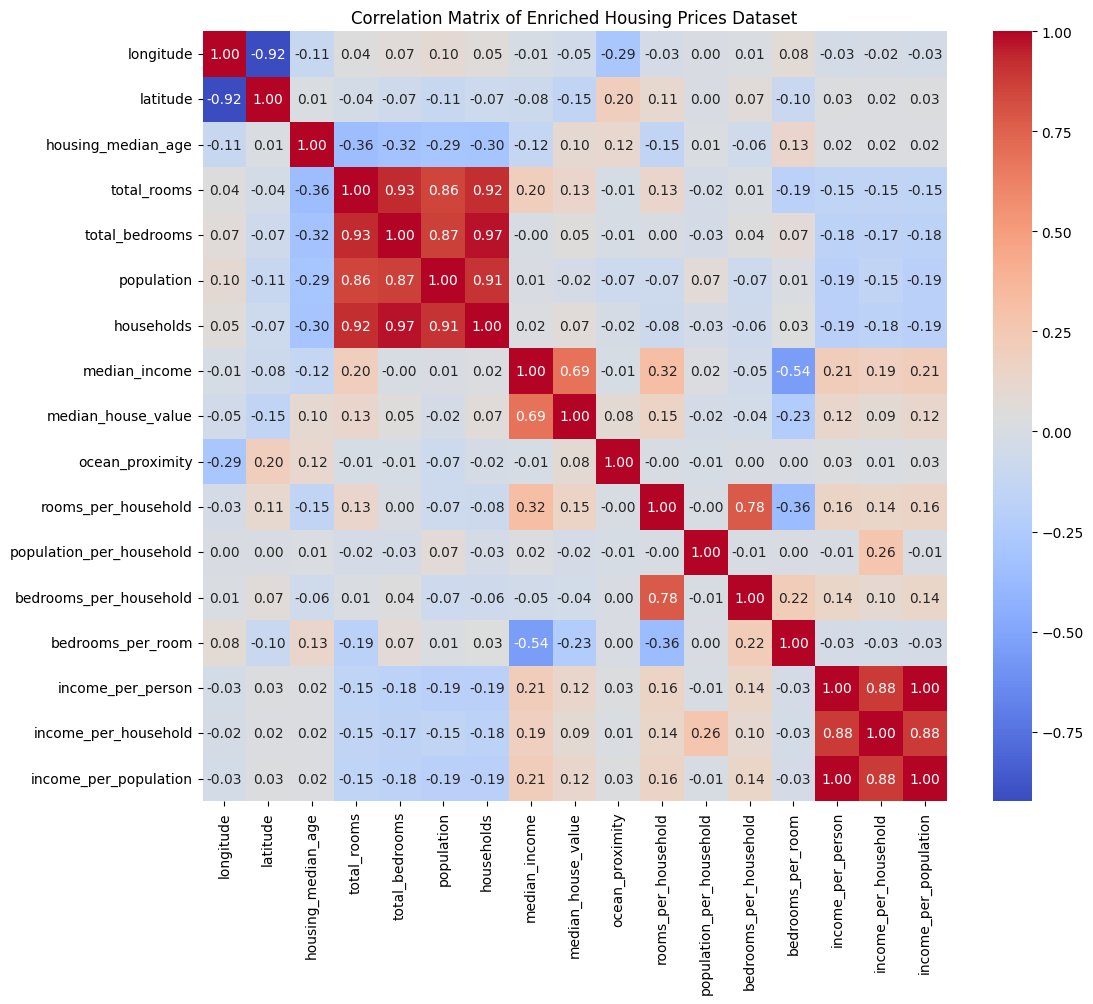

In [39]:
# prompt: visualize the correlation matrix of df_enriched

import matplotlib.pyplot as plt
import seaborn as sns

# Convert ocean_proximity to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_enriched['ocean_proximity'] = le.fit_transform(df_enriched['ocean_proximity'])

# Calculate the correlation matrix
correlation_matrix = df_enriched.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Enriched Housing Prices Dataset')
plt.show()

# Outlier Analysis


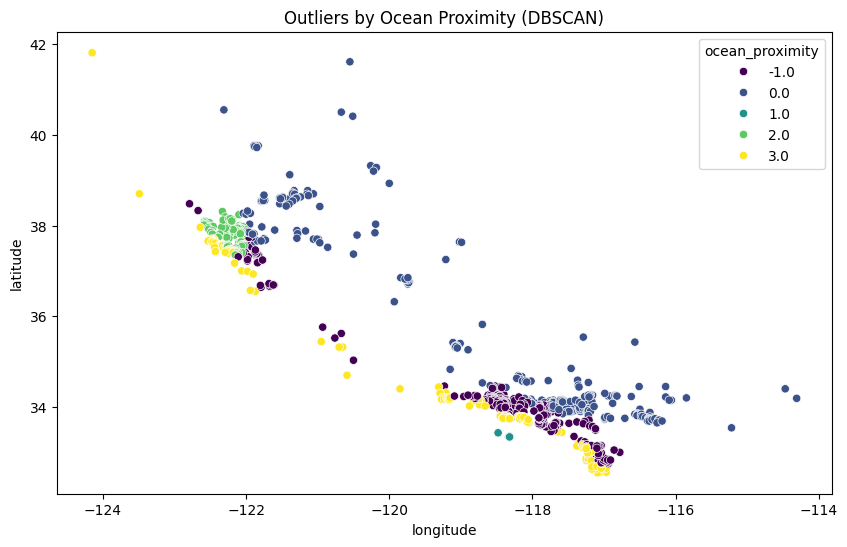

In [26]:
# Convert categorical feature, standardize feature using RobustScaler and Apply DBSCAN (Density-Based Spatial Clustering) on the imputed dataframe df_imputed
# and plot the outliers by ocean_proximity

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
import numpy as np
import seaborn as sns

# Convert categorical feature to numerical using Label Encoding (if not already done)
if not pd.api.types.is_numeric_dtype(df_imputed['ocean_proximity']):
    le = LabelEncoder()
    df_imputed['ocean_proximity'] = le.fit_transform(df_imputed['ocean_proximity'])

# Select features for standardization and clustering
features_to_scale = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                     'population', 'households', 'median_income','ocean_proximity']
df_scaled = df_imputed.copy()

# Standardize selected features using RobustScaler
scaler = RobustScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_imputed[features_to_scale])

# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=20)  # Adjust eps and min_samples as needed
df_scaled['cluster'] = dbscan.fit_predict(df_scaled[features_to_scale])

# Identify outliers (cluster label -1)
outliers = df_scaled[df_scaled['cluster'] == -1]

# Plot outliers by ocean_proximity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='ocean_proximity', data=outliers, palette='viridis')
plt.title('Outliers by Ocean Proximity (DBSCAN)')
plt.show()

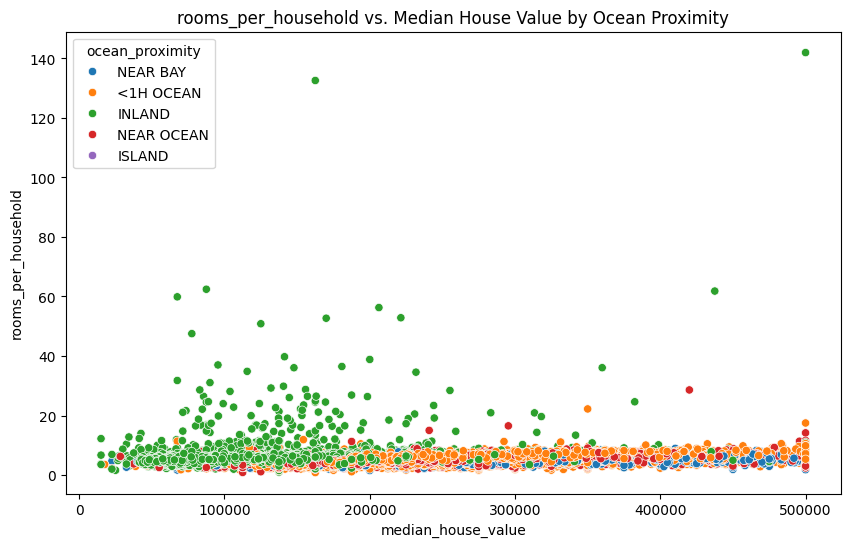

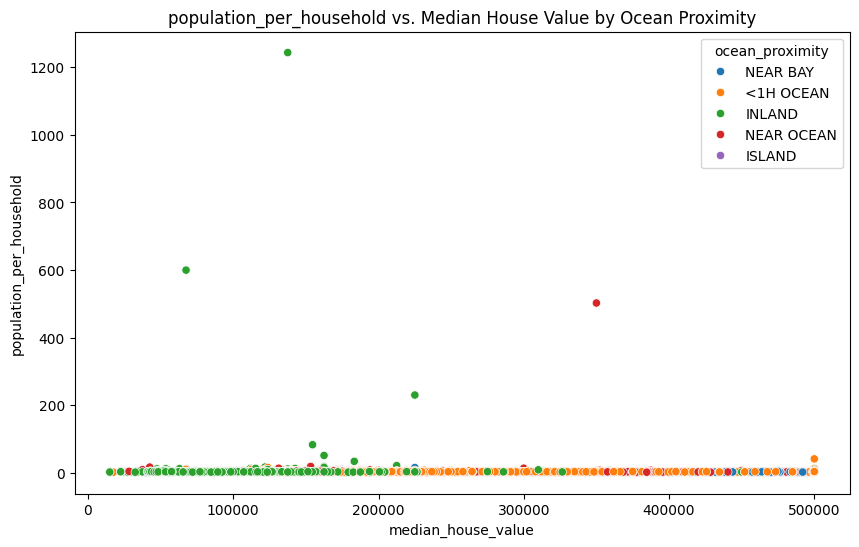

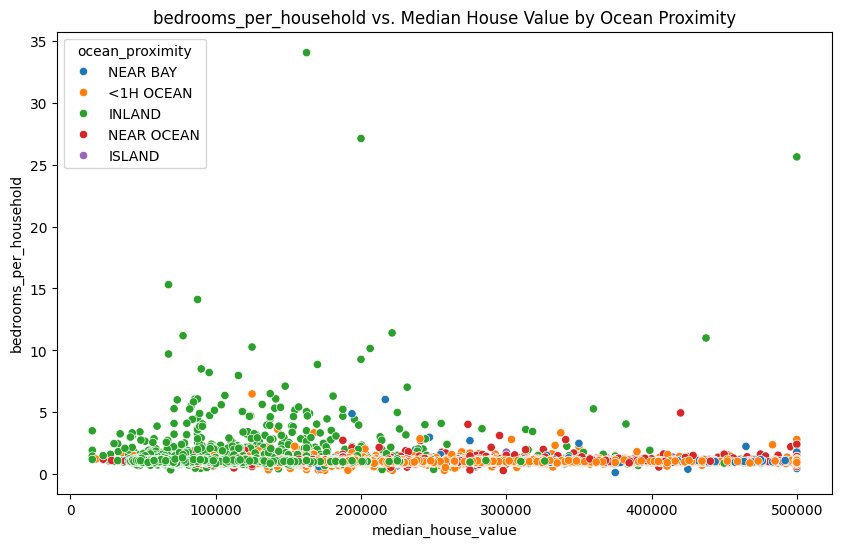

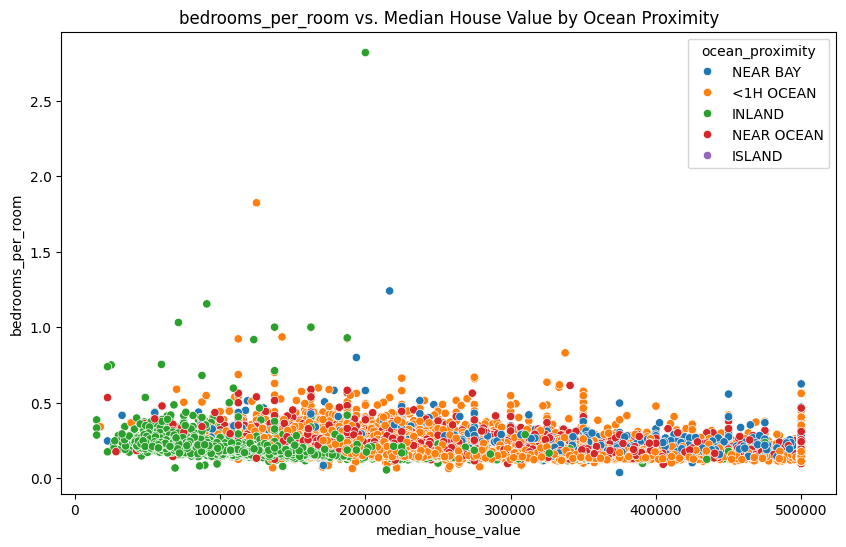

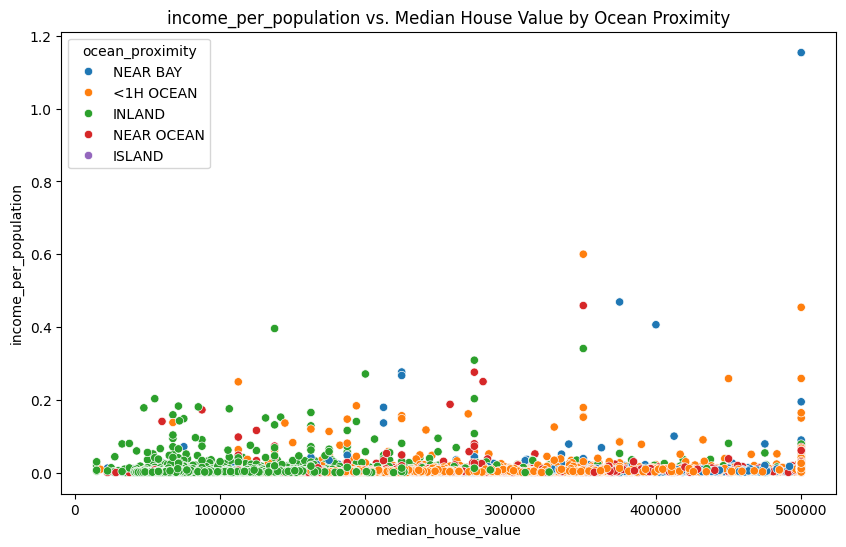

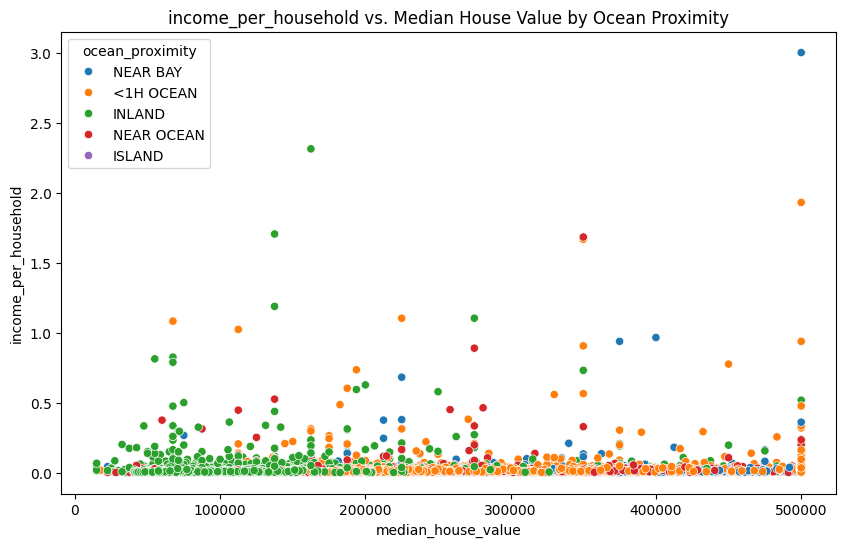

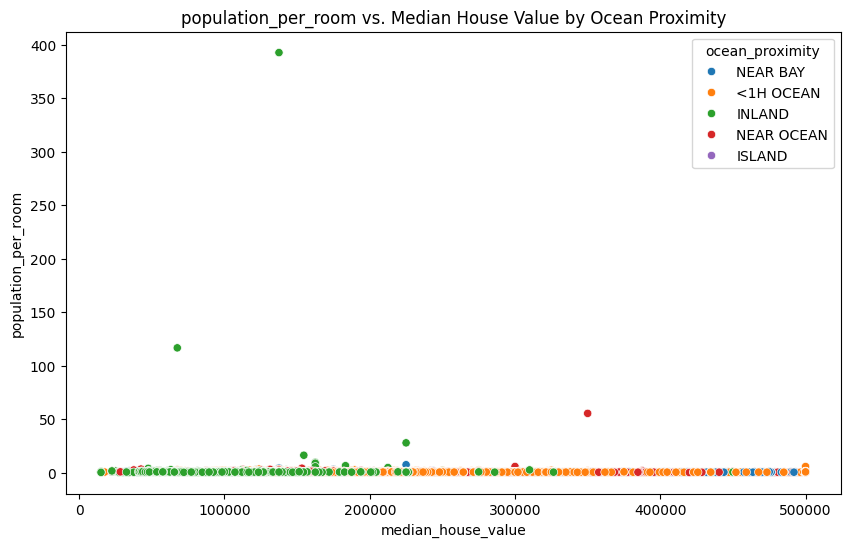

In [33]:
# Visualize the enriched columns against median housing value and ocean proximity

for feature in ['rooms_per_household', 'population_per_household', 'bedrooms_per_household',
                'bedrooms_per_room', 'income_per_population', 'income_per_household', 'population_per_room']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='median_house_value', y=feature, hue='ocean_proximity', data=df_enriched)
    plt.title(f'{feature} vs. Median House Value by Ocean Proximity')
    plt.show()